In [32]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [10]:
df = pd.read_csv('project_data.csv')
df=df.dropna()
syntax_df = pd.read_csv('Langs_Syntax.csv')
commands_list = syntax_df['Command']
syntax_df.set_index('Command')
syntax_df


,Command,C,Python,Swift,PHP,Ruby,Go,JavaScript,Csharp,Python3,Java
0,Comments,// /*,"# """"""",// /*,// # /*,# =begin,// /*,// /*,// /*,"# """"""",// /*
1,Conditions,if if( case ?,if,if,if if(,if unless,if if( case,if if( case,if if( case,if,if if( case ?
2,else,else else{ else\n,else else: elif,else,else,else elseif,else else{ else\n,else else{ else\n,else else{ else\n,else else: elif,else else{ else\n
3,For,for for(,for,for,for for( oreach( foreach,for,for,for for(,for for(,for,for for(
4,While,while while(,while while(,while\n,while while(,while\n,NaN,while while(,while while(,while while(,while while(
5,do ... while,do do{ do\n,NaN,repeat,do do{,loop\nuntil,NaN,do do{ do\n,do do{ do\n,NaN,do do{ do\n
6,Func dec,"""<return_type> <function_name>(""\n""<return_typ...",def,func,function,def,func,function function(,<Access Specifier> <Return Type> <Method Name...,def,"""<return_type> <function_name>(""\n""<return_typ..."
7,Func Calling,"""<func_name>(""\n""<func_name>(""","""<func_name> (""\n""<func_name>(""","""<func_name> (""\n""<func_name>(""","""<func_name> (""\n""<func_name>(""",""".<func_name> ""\n"":<func_name> ""","""<func_name> (""\n""<func_name>(""","""<func_name> (""\n""<func_name>(""","""<func_name> (""\n""<func_name>(""","""<func_name> (""\n""<func_name>(""","""<func_name> (""\n""<func_name>("""
8,Varibales Dec,double\nint\nchar\nString\nfloat\nboolean\nlon...,"""<var_name>=""\n""<var_name> =""",var\nlet,$,"$\n@\n@@\n_\n""<name(only from a-z)=""\n""<name(o...",var,let,int\nchar\nfloat\ndouble\nshort\n,"""<var_name>=""\n""<var_name> =""",double\nint\nchar\nString\nfloat\nboolean\nlon...
9,Pointers,double* int* char* String* float* boolean* lon...,NaN,NaN,NaN,NaN,"""var <name> *""",NaN,NaN,NaN,double* int* char* String* float* boolean* lon...


In [11]:

print("num of rows:",df.shape[0])

num of rows: 1511


In [12]:
df[df['User_Gender']=='Female'].shape[0]

463

In [13]:
def find_lang_syntax(command,lang):
    syntax =[]
    Commands=syntax_df.loc[syntax_df['Command']==command, lang].to_string().split() ##finding comment syntax in c
    for com in Commands:
        syntax.append(com)

    return syntax






In [14]:
df

,User_Name,User_img,User_url,Challange_Name,Programming_Lang,Sol_Code,User_Score,User's_Comments,User_Gender
0,TomGo,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/TomGo,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,10,5,Male
2,buddhaben,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/buddhaben,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,9,0,Male
4,sameerkhan2k1,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/sameerkhan2k1,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,9,0,Male
10,moe123,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/moe123,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,9,0,Female
12,user60612276,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/user60612276,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,9,0,Male
...,...,...,...,...,...,...,...,...,...
2926,bobsany16,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/bobsany16,SQL Member Count,Swift,/* write your SQL query below */\n\nSELECT Rep...,10,0,Male
2927,DanushiW,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/DanushiW,SQL Member Count,Swift,/* write your SQL query below */\n\nSELECT Rep...,10,0,Male
2930,selimfidan2314,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/selimfidan2314,SQL Member Count,Swift,/* write your SQL query below */\n\nSELECT Rep...,10,0,Male
2934,tomldac,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/tomldac,SQL Member Count,Swift,/* write your SQL query below */\n\nSELECT Rep...,10,0,Male


In [15]:

def count_commands(codes, lang, command):
    commands = find_lang_syntax(command, lang)
    counter = 0 # count num of comments
    length_counter = 0
    codes = codes.loc[codes['Programming_Lang']==lang]
    for code in codes['Sol_Code']: #for every code in c
        string = '' #cleaning the word
        for letter in code.split(): #for every letter in the code
            string = string+letter #add to word
            length_counter +=1
            i = 1
            if (commands=='code length'): continue
            while (i < len(commands)): #for every diff syntax
                try:
                    if(letter==commands[i] and len(letter)>1): #check equality
                        counter +=1
                        break
                except IndexError:
                    pass
                i +=1
    if (commands=='code length'):
        counter = length_counter

    return counter


In [16]:
syntax_dict = {'Gender': ['Female', 'Male']}
langs = syntax_df.columns.to_list()
type(langs)
for j in range(len(commands_list)):
#     if j==0: continue
       
    Female_Counter = 0
    Male_Counter = 0
    command = commands_list[j]   
    for i in range(len(langs)):

        lang = langs[i]
        codes = df.loc[df['Programming_Lang']==lang]
        Female_code = codes.loc[codes['User_Gender']=='Female']
        Male_code = codes.loc[codes['User_Gender']=='Male']

        Female_Counter += count_commands(Female_code, lang, command)
        Male_Counter += count_commands(Male_code, lang, command)
       
            
    Female_Count = Female_Counter/(df[df['User_Gender']=='Female'].shape[0])
    Male_Count = Male_Counter/(df[df['User_Gender']=='Male'].shape[0])
    syntax_dict[command] = Female_Count, Male_Count
     

In [18]:

syntax_df = pd.DataFrame(syntax_dict)
syntax_df

,Gender,Comments,Conditions,else,For,While,do ... while,Func dec,Func Calling,Varibales Dec,Pointers,Data Structures,Start and Ending funcs,code length
0,Female,1.250540,1.501080,0.580994,0.652268,0.062635,0.004320,0.848812,0.0,0.066955,0.023758,0.0,0.0,0.0
1,Male,1.078244,1.359733,0.451336,0.710878,0.049618,0.002863,0.956107,0.0,0.180344,0.005725,0.0,0.0,0.0


In [29]:
syntax_df_to_Graph = syntax_df.T

In [30]:

syntax_df_to_Graph

,0,1
Gender,Female,Male
Comments,1.25054,1.07824
Conditions,1.50108,1.35973
else,0.580994,0.451336
For,0.652268,0.710878
While,0.062635,0.0496183
do ... while,0.00431965,0.0028626
Func dec,0.848812,0.956107
Func Calling,0,0
Varibales Dec,0.0669546,0.180344


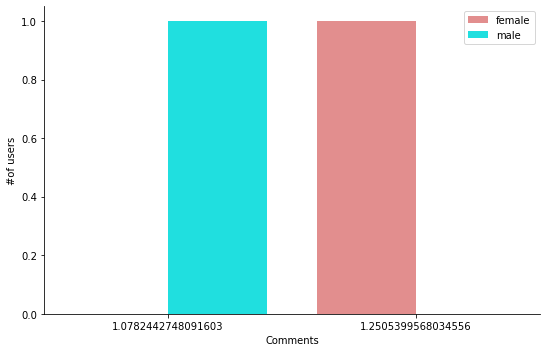

In [46]:
g = sns.catplot(
    x='Comments', 
    data=syntax_df,
    kind='count', 
    hue='Gender',
    palette=["lightcoral", "cyan"], 
    height=5, 
    aspect=1.5,
    legend=False,
    ).set_axis_labels('Comments', '#of users')
g.ax.legend(labels=['female','male'])

In [73]:
syntax_df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Gender', 'Comments', 'Conditions', 'else', 'For', 'While',
       'do ... while', 'Func dec', 'Func Calling', 'Varibales Dec', 'Pointers',
       'Data Structures', 'Start and Ending funcs', 'code length'],
      dtype='object')>

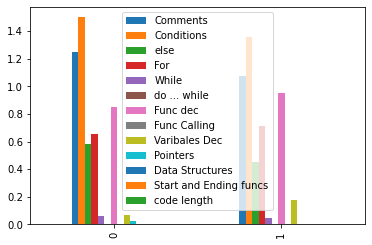

In [86]:
syntax_df.plot(kind = 'bar')
plt.show()

Gender  Gender
Female  Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male    Male      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

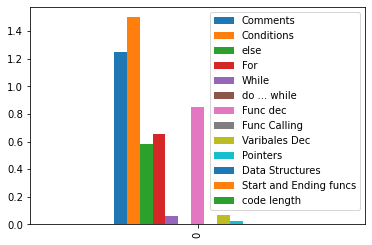

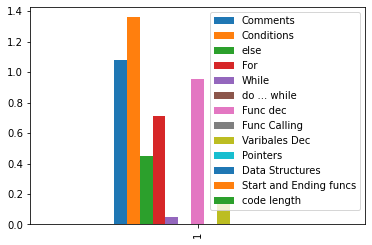

In [90]:
gender_column = syntax_df['Gender']
syntax_df.groupby(["Gender", gender_column]).plot(kind='bar')